<h1><center>Multiple Linear Regression</center></h1>

In this notebook, we will be implementing the multiple linear regression. We will be using the data related to fuel consumption and carbon dioxide emission of cars.

Before we start a brief intro of Multiple linear regression :

    - Multiple linear regression is a machine learning algorithm based on supervised learning.
    - It predict the continous dependent value by the independent variables.
    - It models the linear relationship between a single dependent continuous variable and more than one
      independent variable.


### Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data in

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



<h2 id="understanding_data">Understanding the Data</h2>

###  `FuelConsumption`:
Our dataset of fuel consumption is ready,FuelConsumption which contains  fuel consumption of different moddels,ratings and estimated carbon dioxide emissions which will effect the prcing and sale of the different models. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** 
- **MAKE** 
- **MODEL** 
- **VEHICLE CLASS**
- **ENGINE SIZE** 
- **CYLINDERS** 
- **TRANSMISSION** 
- **FUEL CONSUMPTION in CITY(L/100 km)** 
- **FUEL CONSUMPTION in HWY (L/100 km)** 
- **FUEL CONSUMPTION COMB (L/100 km)** 
- **CO2 EMISSIONS (g/km)**


Lets select some features that we want to use for regression.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Exploring Dataset to check which are the independent valriables who have the best correlation with the dependent variable <b>CO2EMISSIONS</b>

Lets plot Emission values with respect to different independent variable:

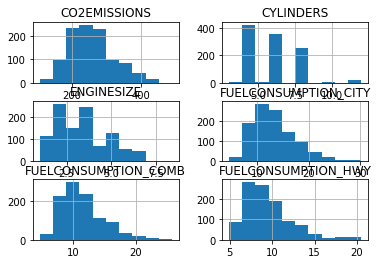

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

In [7]:
cdf.corr().CO2EMISSIONS

ENGINESIZE              0.874154
CYLINDERS               0.849685
FUELCONSUMPTION_CITY    0.898039
FUELCONSUMPTION_HWY     0.861748
FUELCONSUMPTION_COMB    0.892129
CO2EMISSIONS            1.000000
Name: CO2EMISSIONS, dtype: float64

### The .corr() method help us to find the correlation between the different columns . The maximum absolute value tends towards 1 the best it will impact to dependent variable.

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on <b>*out-of-sample accuracy*</b> because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [95]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Score: ', regr.score(x, y))

Coefficients:  [[11.2838336   7.1994106   9.79756074]]
Score:  0.8774448438453744


The total number of coefficient is the total number of the independent variables in train data.

<h3>using the equation Y = $\theta_0$ + $\theta_1$ $X_1$ + $\theta_2$ $X_2$ + $\theta_3$ $X_3$ -- For multiple linear regression</h3>

    where Y is the dependent variable that we have to predict.

__Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

<h2 id="prediction">Prediction</h2>

In [43]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
predict_val = pd.DataFrame(y_hat)

In [44]:
predict_val = predict_val.rename(columns={0:'prediced_val'})

In [82]:
y_hat.round(2)

array([[250.92],
       [246.02],
       [262.97],
       [370.19],
       [206.86],
       [222.74],
       [251.16],
       [289.58],
       [253.12],
       [293.49],
       [265.85],
       [216.66],
       [384.85],
       [181.38],
       [198.04],
       [204.9 ],
       [235.48],
       [218.82],
       [246.26],
       [222.74],
       [306.83],
       [315.64],
       [252.14],
       [200.98],
       [301.04],
       [309.85],
       [209.56],
       [258.91],
       [258.91],
       [336.93],
       [336.93],
       [388.86],
       [257.93],
       [262.83],
       [309.5 ],
       [301.66],
       [306.91],
       [343.43],
       [352.49],
       [374.85],
       [212.74],
       [199.76],
       [330.08],
       [279.54],
       [362.05],
       [362.05],
       [191.27],
       [289.28],
       [254.99],
       [254.99],
       [293.2 ],
       [289.28],
       [314.64],
       [257.93],
       [293.2 ],
       [284.38],
       [329.39],
       [206.47],
       [309.85

In [86]:
actual = pd.DataFrame(test['CO2EMISSIONS'])
actual= actual.to_numpy()
actual

array([[244],
       [232],
       [267],
       [359],
       [214],
       [224],
       [258],
       [288],
       [262],
       [297],
       [292],
       [237],
       [437],
       [181],
       [193],
       [209],
       [221],
       [213],
       [246],
       [191],
       [317],
       [338],
       [260],
       [200],
       [250],
       [264],
       [207],
       [260],
       [260],
       [340],
       [340],
       [322],
       [258],
       [269],
       [276],
       [258],
       [259],
       [380],
       [414],
       [435],
       [228],
       [184],
       [324],
       [290],
       [294],
       [294],
       [193],
       [230],
       [251],
       [251],
       [237],
       [230],
       [301],
       [258],
       [237],
       [222],
       [317],
       [202],
       [264],
       [285],
       [166],
       [182],
       [248],
       [368],
       [315],
       [336],
       [288],
       [264],
       [179],
       [170],
       [162],
      

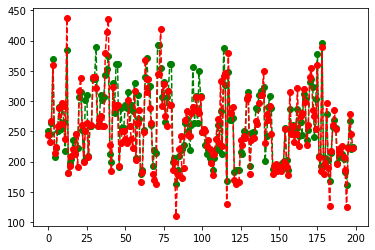

In [91]:
import matplotlib.pyplot as plt
plt.plot(y_hat,'go--', actual, 'ro--')
plt.show()

### These are the predicted value obtained by the trainded model, We will comapre this with the original data and see how much our models fits

In [10]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 734.81
Variance score: 0.79


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.